# Import Library

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [26]:
df = pd.read_csv('kmeans_pollution.csv')

In [27]:
df.head()

,Country,City,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,cluster_label
0,Russian Federation,Praskoveya,1,36,0,51,3
1,Brazil,Presidente Dutra,1,5,1,41,3
2,Italy,Priolo Gargallo,1,39,2,66,3
3,Poland,Przasnysz,1,34,0,20,2
4,France,Punaauia,0,22,0,6,3


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data Splitting

Data splitting pada klasifikasi ini menggunakan cross validation untuk menghindari terjadinya overfitting pada output nantinya

In [29]:
# Pisahkan fitur dan target
X = df.drop(columns=['cluster_label', 'City', 'Country'])  
y = df['cluster_label']

In [30]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)  

Kode ini digunakan untuk memastikan bahwa data numerik pada kolom cluster_label berupa kategorikal

## Cross Validation

In [31]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Pemilihan Model

Pada klasifikasi ini saya menggunakan 2 model klasifikasi yaitu knn dan decision tree, yang dimana nantinya kedua model ini akan dibadingkan berdasarkan akurasi yang dihasilkan dari berbagai macam metode evaluasi

In [32]:
# Inisialisasi model
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier(random_state=42)

# Prediksi dengan cross-validation
knn_pred = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
dt_pred = cross_val_score(dt, X, y, cv=kf, scoring='accuracy')

# Evaluasi Model

In [33]:
print("Akurasi tiap fold:", knn_pred)
print("Rata-rata akurasi:", knn_pred.mean())

Akurasi tiap fold: [0.60104189 0.6110267  0.60234426 0.59865422 0.61146082]
Rata-rata akurasi: 0.6049055784675494


In [34]:
print("Akurasi tiap fold:", dt_pred)
print("Rata-rata akurasi:", dt_pred.mean())

Akurasi tiap fold: [0.60342956 0.60777078 0.5982201  0.60342956 0.59865422]
Rata-rata akurasi: 0.6023008465378771


2 cell code diatas menunjukkan hasil akurasi menggunakan cross validation. Berdasarkan hasil yang diberikan dapat kita lihat bahwa decision tree memberikan hasil yang lebih optimal dibandingkan dengan knn, **decision tree dengan score rata2 adalah 0,99 (hampir mendekati 1)** sementara **knn memberikan akurasi rata-rata sebesar 0,97**

In [38]:
# Lakukan prediksi menggunakan cross-validation
knn_pred_cm = cross_val_predict(knn, X, y, cv=kf)
dt_pred_cm = cross_val_predict(dt, X, y, cv=kf)

# Hitung confusion matrix
knn_cm = confusion_matrix(y, knn_pred_cm)
dt_cm = confusion_matrix(y, dt_pred_cm)

## Confussion Matrix

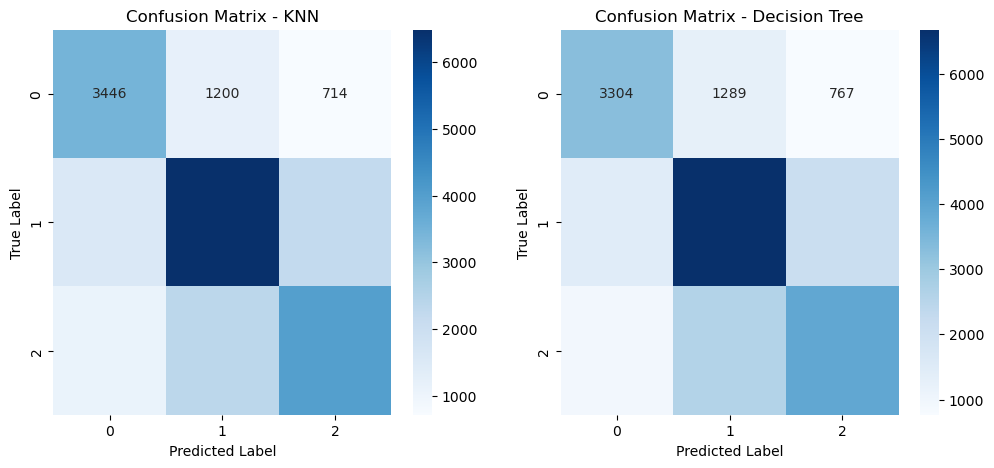

In [39]:
# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - KNN")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix - Decision Tree")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()

Berdasarkan confusion matrix di atas, model KNN menunjukkan performa yang sedikit lebih baik dibandingkan Decision Tree, terutama dalam mengklasifikasikan label 0 dengan jumlah prediksi yang lebih akurat. Namun, secara keseluruhan, perbedaannya tidak terlalu signifikan.

## Precision, Recall, F1 Score

In [40]:
# Fungsi untuk menghitung metrik evaluasi
def evaluate_model(y_true, y_pred):
    return [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, average='weighted'),
        recall_score(y_true, y_pred, average='weighted'),
        f1_score(y_true, y_pred, average='weighted')
    ]

# Buat DataFrame evaluasi
df_metrics = pd.DataFrame(
    [evaluate_model(y, knn_pred_cm), evaluate_model(y, dt_pred_cm)],
    index=["KNN", "Decision Tree"],
    columns=["Akurasi", "Precision", "Recall", "F1 Score"]
)

# Tampilkan hasil evaluasi
print("Tabel Evaluasi Model:")
display(df_metrics)

Tabel Evaluasi Model:


,Akurasi,Precision,Recall,F1 Score
KNN,0.604906,0.605932,0.604906,0.604600
Decision Tree,0.602301,0.601421,0.602301,0.601317


# Kesimpulan

Berdasarkan hasil klasifikasi, **KNN** menunjukkan performa yang lebih maksimal dibandingkan **Decision Tree**, meskipun perbedaannya tidak terlalu signifikan. Rata-rata nilai dari **confusion matrix** yang diperoleh adalah **0,60**, yang mengindikasikan bahwa model masih dapat ditingkatkan. Salah satu faktor yang mungkin memengaruhi hasil ini adalah **ketidakseimbangan skala pada data numerik**. Seharusnya, dilakukan proses **scaling** terlebih dahulu untuk menyamakan rentang nilai, sehingga model dapat belajar lebih optimal dan menghasilkan prediksi yang lebih akurat.